In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
tf.enable_eager_execution()

In [2]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(2.0)
    
    def __call__(self,x):
        return x * self.W + self.b

model = Model()
assert model(3.0).numpy() == 17.0

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
def loss(predicted_output,desired_output):
    return  tf.reduce_mean(tf.square(predicted_output-desired_output))

In [11]:
true_w=1.0
true_b=1.0
num_ex=1000
inputs=tf.random_normal(shape=[num_ex])
noise=tf.random_normal(shape=[num_ex])
output=true_w*inputs+true_b+noise

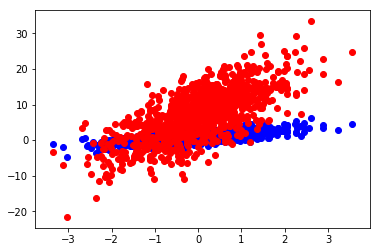

In [12]:
plt.scatter(inputs,output,c='b')
plt.scatter(inputs,model(output),c='r')
plt.show()

In [15]:
print("Loss %s" % (loss(model(inputs),output)))

Loss tf.Tensor(18.136189, shape=(), dtype=float32)


In [16]:
def train(model,inputs,output,l_r):
    with tf.GradientTape() as tg:
        current_loss = loss(model(inputs),output)
    dw,db=tg.gradient(current_loss,[model.W,model.b])
    model.W.assign_sub(l_r*dw)
    model.b.assign_sub(l_r*db)

In [19]:
model = Model()
Ws,bs=[],[]
losses=[]
epochs = 10
for epoch in range(epochs):
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs),output)
    losses.append(current_loss)
    train(model,inputs,output,0.01)
    print("Epochs %d: Weight %1.2f Bias %1.2f loss %2.5f" % (epoch,Ws[-1],bs[-1],current_loss))
    

Epochs 0: Weight 5.00 Bias 2.00 loss 18.13619
Epochs 1: Weight 4.92 Bias 1.98 loss 17.45029
Epochs 2: Weight 4.84 Bias 1.96 loss 16.79181
Epochs 3: Weight 4.76 Bias 1.94 loss 16.15963
Epochs 4: Weight 4.69 Bias 1.92 loss 15.55272
Epochs 5: Weight 4.61 Bias 1.90 loss 14.97006
Epochs 6: Weight 4.54 Bias 1.88 loss 14.41068
Epochs 7: Weight 4.47 Bias 1.86 loss 13.87366
Epochs 8: Weight 4.40 Bias 1.85 loss 13.35809
Epochs 9: Weight 4.33 Bias 1.83 loss 12.86313
